In [2]:
import pandas as pd
import on_islem2

In [3]:
df = pd.read_csv("C:/Users/frknq/Code/NLP/NLP_Proje/nlp_proje_metin_siniflandirma.csv", index_col = 0)

In [4]:
df.head(10)

,Text,Label
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1
1,hayat paylaşınca güzel...türkcell...,1
2,superonline varya daha iyi,1
3,hahaha kanka turkcell bu 4 ceker :d,1
4,turkcell 3 tl hediye etse bana ne güzel olur =),1
5,eğer bir gün isterseniz siz de turkcell kampan...,1
6,superonline tabiki :),1
7,ben teşekkür ederim:) hayat paylaşınca güzel d...,1
8,tabiki hayat paylaşınca güzel :)) sohbetin çok...,1
9,&amp; sen neleri cozmussun burası ne ki senin ...,1


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.loc[100,"Text"]

'busefer kazanan ben oldum bak turkcell.aksam 9 sabah 6,120tl bedava vermissin.hicte uyku saatim degil.carcur ettik daha da edicez bil yani'

In [7]:
df.groupby("Label").size()

Label
1     756
2    1287
3     957
dtype: int64

In [8]:
df.isna()

,Text,Label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [9]:
df['Text'] = df['Text'].astype(str)

In [11]:
df["Text_2"] = df['Text'].apply(on_islem2.pre_processing)
df.head()

,Text,Label,Text_2
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1,"[turkcellmüzik, biraz, dah, geliş, fizy, yi, t..."
1,hayat paylaşınca güzel...türkcell...,1,"[hayat, paylaş, güzeltürkcell]"
2,superonline varya daha iyi,1,"[superonl, varya, dah, ]"
3,hahaha kanka turkcell bu 4 ceker :d,1,"[hahah, kanka, turkcell, bu, , ceker, ]"
4,turkcell 3 tl hediye etse bana ne güzel olur =),1,"[turkcell, , tl, hedi, et, ba, , güzel, olur, ]"


In [12]:
df["Text_2"] = df['Text_2'].apply(on_islem2.remove_space)
df.head()

,Text,Label,Text_2
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1,"[turkcellmüzik, biraz, dah, geliş, fizy, yi, t..."
1,hayat paylaşınca güzel...türkcell...,1,"[hayat, paylaş, güzeltürkcell]"
2,superonline varya daha iyi,1,"[superonl, varya, dah]"
3,hahaha kanka turkcell bu 4 ceker :d,1,"[hahah, kanka, turkcell, bu, ceker]"
4,turkcell 3 tl hediye etse bana ne güzel olur =),1,"[turkcell, tl, hedi, et, ba, güzel, olur]"


In [13]:
df.groupby("Label").head()

,Text,Label,Text_2
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1,"[turkcellmüzik, biraz, dah, geliş, fizy, yi, t..."
1,hayat paylaşınca güzel...türkcell...,1,"[hayat, paylaş, güzeltürkcell]"
2,superonline varya daha iyi,1,"[superonl, varya, dah]"
3,hahaha kanka turkcell bu 4 ceker :d,1,"[hahah, kanka, turkcell, bu, ceker]"
4,turkcell 3 tl hediye etse bana ne güzel olur =),1,"[turkcell, tl, hedi, et, ba, güzel, olur]"
756,iphone 4s 16 aralık'ta turkcell'de!,3,"[ipho, s, aralık, turkcellde]"
757,peki bunu benim özturkcell okumama ne dicez ?,3,"[pek, be, özturkcell, okuma, dicez]"
758,sahnede turkcell bandosu ve celloband....,3,"[sahne, turkcell, bandos, celloband]"
759,"avea fena değil ama vodafone kafasi cok iyi, s...",3,"[avea, fena, değil, am, vodafone, kafasi, cok,..."
760,turkcell mi türkcell mi ? bugün bi yerde gördü...,3,"[turkcell, mi, türkcell, mi, bugu, bi, yer, gö..."


In [14]:
df_index = df[df["Text_2"].str[0].isnull()].index
df = df.drop(df_index)
df = df.reset_index()
del df["index"]

df[df["Text_2"].str[0].isnull()]

,Text,Label,Text_2


In [15]:
df["Text_3"] = [' '.join(wrd for wrd in x)for x in df["Text_2"]]
df.head()

,Text,Label,Text_2,Text_3
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1,"[turkcellmüzik, biraz, dah, geliş, fizy, yi, t...",turkcellmüzik biraz dah geliş fizy yi tamame b...
1,hayat paylaşınca güzel...türkcell...,1,"[hayat, paylaş, güzeltürkcell]",hayat paylaş güzeltürkcell
2,superonline varya daha iyi,1,"[superonl, varya, dah]",superonl varya dah
3,hahaha kanka turkcell bu 4 ceker :d,1,"[hahah, kanka, turkcell, bu, ceker]",hahah kanka turkcell bu ceker
4,turkcell 3 tl hediye etse bana ne güzel olur =),1,"[turkcell, tl, hedi, et, ba, güzel, olur]",turkcell tl hedi et ba güzel olur


# TF-IDF

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [17]:
msg_train,msg_test,label_train,label_test = train_test_split(df["Text_3"].tolist(),df["Label"].tolist(),test_size=0.2,random_state=42)

In [18]:
knn = Pipeline([('vect',TfidfVectorizer()),('knn',KNeighborsClassifier())])

In [19]:
knn.fit(msg_train,label_train)
y_pred_class = knn.predict(msg_test)

print("knn accuracy score :",accuracy_score(label_test,y_pred_class))
print("knn f1 score :",f1_score(label_test,y_pred_class,average="weighted"))

knn accuracy score : 0.4816666666666667
knn f1 score : 0.47711431870984256


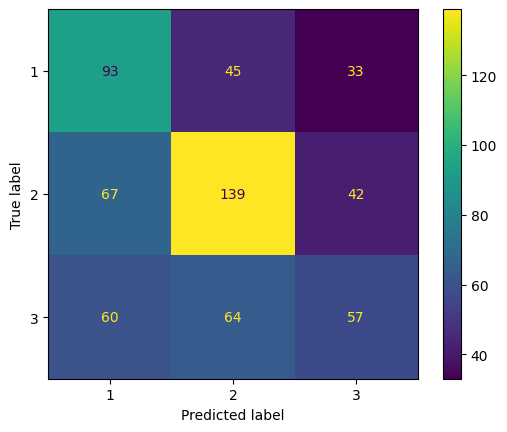

In [20]:
cm = confusion_matrix(label_test,y_pred_class,labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()

# Word2vec

In [21]:
from gensim.models import Word2Vec

In [22]:
df.head()

,Text,Label,Text_2,Text_3
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1,"[turkcellmüzik, biraz, dah, geliş, fizy, yi, t...",turkcellmüzik biraz dah geliş fizy yi tamame b...
1,hayat paylaşınca güzel...türkcell...,1,"[hayat, paylaş, güzeltürkcell]",hayat paylaş güzeltürkcell
2,superonline varya daha iyi,1,"[superonl, varya, dah]",superonl varya dah
3,hahaha kanka turkcell bu 4 ceker :d,1,"[hahah, kanka, turkcell, bu, ceker]",hahah kanka turkcell bu ceker
4,turkcell 3 tl hediye etse bana ne güzel olur =),1,"[turkcell, tl, hedi, et, ba, güzel, olur]",turkcell tl hedi et ba güzel olur


In [23]:
model = Word2Vec(sentences = df["Text_2"].tolist(),vector_size=100,window=5,min_count=1)
model.save("C:/Users/frknq/Code/NLP/NLP_Proje/word2vec.model")


def word2vec(value):
    model = Word2Vec.load("C:/Users/frknq/Code/NLP/NLP_Proje/word2vec.model")
    bfr_list=[]
    bfr_len=len(value)

    for k in value:
        bfr=model.wv.key_to_index[k]
        bfr=model.wv[bfr]
        bfr_list.append(bfr)

    bfr_list = sum(bfr_list)
    bfr_list = bfr_list/bfr_len
    return bfr_list.tolist()

df["Text_6"]=df["Text_2"].apply(word2vec)

df["word2vec"] = df["Text_2"].apply(on_islem2.word2vec)

In [ ]:
#model.build_vocab(df["Text_2"].tolist(),update = True)
#model.save("NLP_Proje/word2vec.model")

In [24]:
df.head()

,Text,Label,Text_2,Text_3,Text_6,word2vec
0,turkcellmüzik biraz daha gelişsin fizy yi tama...,1,"[turkcellmüzik, biraz, dah, geliş, fizy, yi, t...",turkcellmüzik biraz dah geliş fizy yi tamame b...,"[-0.006835920736193657, 0.012449857778847218, ...","[-0.006835920736193657, 0.012449857778847218, ..."
1,hayat paylaşınca güzel...türkcell...,1,"[hayat, paylaş, güzeltürkcell]",hayat paylaş güzeltürkcell,"[-0.03116457723081112, 0.045081350952386856, 0...","[-0.03116457723081112, 0.045081350952386856, 0..."
2,superonline varya daha iyi,1,"[superonl, varya, dah]",superonl varya dah,"[-0.024415725842118263, 0.0447322316467762, 0....","[-0.024415725842118263, 0.0447322316467762, 0...."
3,hahaha kanka turkcell bu 4 ceker :d,1,"[hahah, kanka, turkcell, bu, ceker]",hahah kanka turkcell bu ceker,"[-0.03763146698474884, 0.05361279845237732, 0....","[-0.03763146698474884, 0.05361279845237732, 0...."
4,turkcell 3 tl hediye etse bana ne güzel olur =),1,"[turkcell, tl, hedi, et, ba, güzel, olur]",turkcell tl hedi et ba güzel olur,"[-0.03672109171748161, 0.06286699324846268, 0....","[-0.03672109171748161, 0.06286699324846268, 0...."


In [25]:
msg_train, msg_test, label_train, label_test = train_test_split(df["word2vec"].tolist(),df["Label"].tolist(),test_size = 0.2,random_state=42)
knn = Pipeline([('knn',KNeighborsClassifier())])

In [26]:
knn.fit(msg_train,label_train)
y_pred_class = knn.predict(msg_test)

print("knn accuracy score :",accuracy_score(label_test,y_pred_class))
print("knn f1 score :",f1_score(label_test,y_pred_class,average="weighted"))

knn accuracy score : 0.42833333333333334
knn f1 score : 0.39244534597883


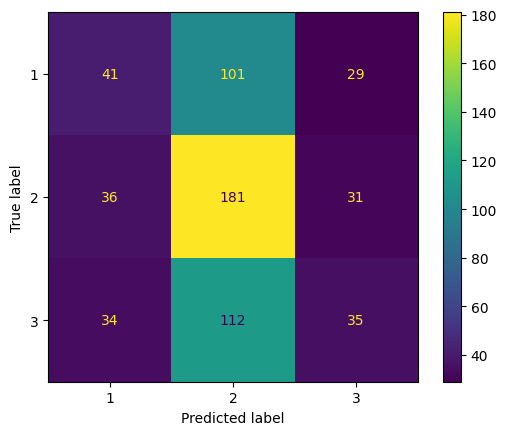

In [28]:
cm = confusion_matrix(label_test,y_pred_class,labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()